<a href="https://colab.research.google.com/github/jtunde/Python/blob/main/cn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:

data = pd.read_csv('drive/MyDrive/data.csv')
print(data.head())

         TIME     RON
0  2021-01-01  4.9493
1  2021-01-02  4.9493
2  2021-01-03  4.9493
3  2021-01-04  4.8713
4  2021-01-05  4.8721


In [13]:
data.index = pd.to_datetime(data['TIME'], format='%Y-%m-%d')

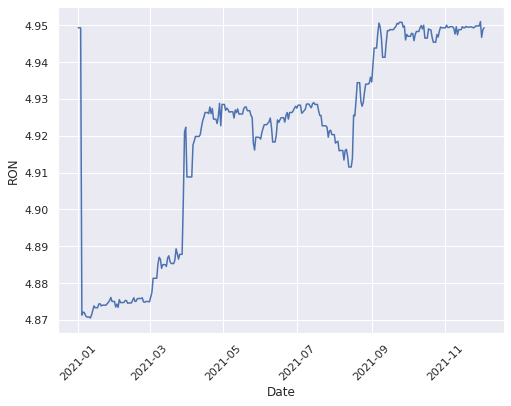

In [14]:
sns.set()
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(data.index, data['RON'], )

In [19]:
train = data[data.index < pd.to_datetime("2021-10-01", format='%Y-%m-%d')]
test = data[data.index > pd.to_datetime("2021-10-01", format='%Y-%m-%d')]
print(train)

                  TIME     RON
TIME                          
2021-01-01  2021-01-01  4.9493
2021-01-02  2021-01-02  4.9493
2021-01-03  2021-01-03  4.9493
2021-01-04  2021-01-04  4.8713
2021-01-05  2021-01-05  4.8721
...                ...     ...
2021-09-26  2021-09-26  4.9508
2021-09-27  2021-09-27  4.9495
2021-09-28  2021-09-28  4.9498
2021-09-29  2021-09-29  4.9460
2021-09-30  2021-09-30  4.9475

[273 rows x 2 columns]


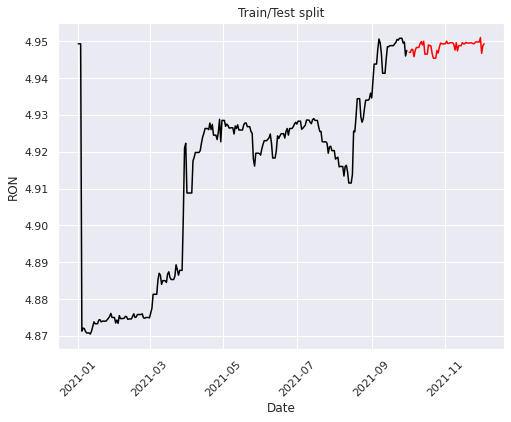

In [119]:
train = data[data.index < pd.to_datetime("2021-10-01", format='%Y-%m-%d')]
test = data[data.index > pd.to_datetime("2021-10-01", format='%Y-%m-%d')]

plt.plot(train['RON'], color = "black")
plt.plot(test['RON'], color = "red")
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2021-10-01 00:00:00   2021-12-02 00:00:00
TIME
2021-10-02    4.947654
2021-10-03    4.947521
2021-10-04    4.947629
2021-10-05    4.947535
2021-10-06    4.947609
                ...   
2021-11-29    4.947464
2021-11-30    4.947462
2021-12-01    4.947460
2021-12-02    4.947458
2021-12-03    4.947456
Name: Predictions, Length: 63, dtype: float64
MSE:  0.001713416395447337


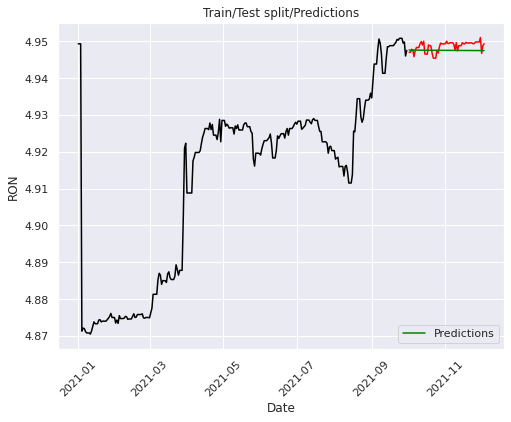

In [114]:
#1
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['RON']
#print(y)
ARMAmodel = SARIMAX(y, order = (2, 1, 2))
ARMAmodel = ARMAmodel.fit(disp=False)

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5) 
#print(y_pred_df)

start = y_pred_df.index[0]
end = y_pred_df.index[-1]

print(start,' ', end)

y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

print(y_pred_out)

plt.plot(train['RON'], color = "black")
plt.plot(test['RON'], color = "red")
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split/Predictions")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["RON"].values, y_pred_df["Predictions"]))
print("MSE: ",arma_rmse)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE:  0.004737733387625022


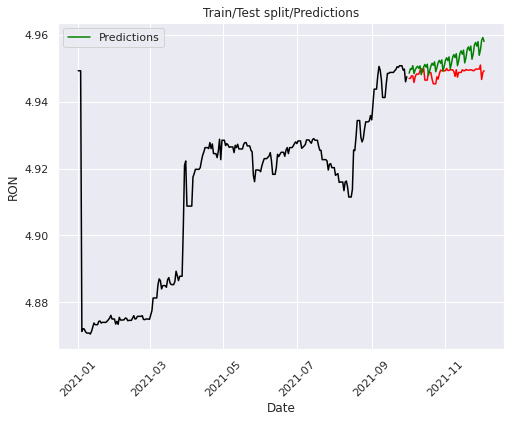

In [138]:
#2
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['RON']
#print(y)
SARIMAXmodel = SARIMAX(y, order = (2, 1, 2), seasonal_order=(2,2,2,6))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
#print(y_pred)
y_pred_df = y_pred.conf_int(alpha = 0.6) 
#print(y_pred_df)

y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train['RON'], color = "black")
plt.plot(test['RON'], color = "red")
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split/Predictions")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["RON"].values, y_pred_df["Predictions"]))
print("MSE: ",arma_rmse)
